In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px



In [3]:
df = pd.read_csv('UrbanizationCensusTract.csv')
df.head()

,Unnamed: 0,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex,log_pop
0,0,1,Alabama,G0100010020100,32.47718,-86.49007,1845,44076.0,10.69367,7.520235
1,1,1,Alabama,G0100010020200,32.47425,-86.47337,2172,43008.0,10.66914,7.683404
2,2,1,Alabama,G0100010020300,32.47543,-86.46019,3385,38987.0,10.57098,8.127109
3,3,1,Alabama,G0100010020400,32.47200,-86.44363,4267,43131.0,10.67200,8.358666
4,4,1,Alabama,G0100010020500,32.45883,-86.42266,9965,43131.0,10.67200,9.206834


- 'statefips'	FIPS code for each state
- 'state'	Name of state
- 'gisjoin'	Geographic Identifier for the census tract from the 2010 census
- 'lat_tract'	Latitude of the center of the census tract
- 'long_tract'	Longitude of the center of the census tract
- 'population'	Number of people living in the census tract according to 5-year American Community Survey data from 2017
- 'adj_radiuspop_5'	Estimate of the number of people within a 5-mile radius of a census tract. For a census tract that is more than 5 miles away any other census tract (centroid to centroid), this number is decreased based on the minimum distance to the nearest census tract
- 'urbanindex'	A calculation of how urban or rural a given area is; calculated as the natural logarithm of adj_radiuspop_5


<AxesSubplot:>

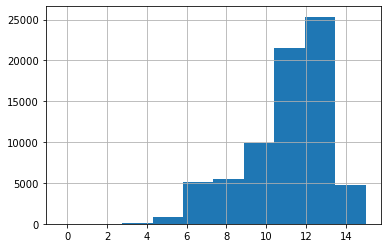

In [4]:
df['urbanindex'].hist()

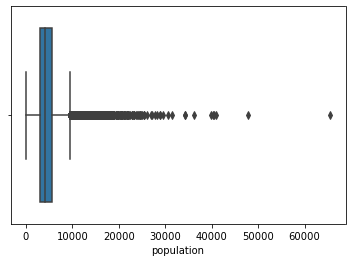

In [5]:
sns.boxplot(x=df['population'])
plt.show()


In [6]:
df['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [7]:
df_alaska=df[df['state']=='Alaska']
df_alaska

,Unnamed: 0,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex,log_pop
1176,1176,2,Alaska,G0200130000100,55.36356,-161.99370,3338,1.447378,0.369753,8.113127
1177,1177,2,Alaska,G0200160000100,52.51656,-87.62968,975,0.742474,-0.297768,6.882437
1178,1178,2,Alaska,G0200160000200,53.67216,-166.86780,4809,1.447378,0.369753,8.478244
1179,1179,2,Alaska,G0200200000101,61.26067,-148.82590,5514,376.531000,5.931001,8.615046
1180,1180,2,Alaska,G0200200000102,61.33286,-149.36830,5198,14903.000000,9.609318,8.556029
...,...,...,...,...,...,...,...,...,...,...
1336,1336,2,Alaska,G0202820000100,59.89281,-140.36700,682,3.297679,1.193219,6.525030
1337,1337,2,Alaska,G0202900000100,66.85707,-144.45050,1224,3.746182,1.320737,7.109879
1338,1338,2,Alaska,G0202900000200,66.04549,-150.87210,1378,5.268563,1.661758,7.228388
1339,1339,2,Alaska,G0202900000300,65.33978,-156.23380,1823,3.196699,1.162119,7.508239


In [8]:
len(df['gisjoin'].value_counts())

73280

In [9]:
states=df[(df['state']=="California")  | (df['state']=="Nebraska") |  (df['state']=="Arizona") | (df['state']=="Texas")]

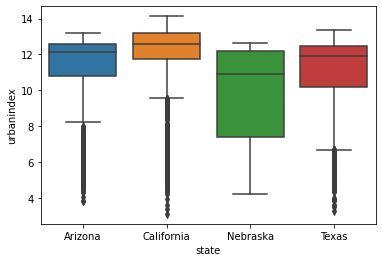

In [10]:
sns.boxplot(x=states['state'], y=states['urbanindex'])
plt.show()

<AxesSubplot:>

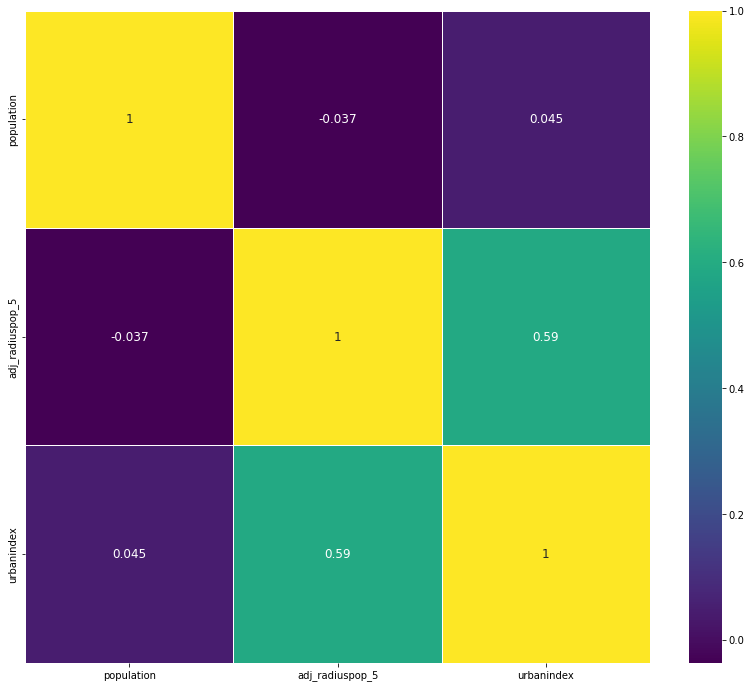

In [11]:
cols_num = ['population', 'adj_radiuspop_5', 'urbanindex'] 
correlation = df.corr().loc[cols_num, cols_num]
   
fig , ax = plt.subplots(figsize = (14,12))  

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})



In [12]:
states_2=df[(df['state']=="Alaska")  | (df['state']=="Oklahoma") |  (df['state']=="North Dakota") | (df['state']=="Montana")]

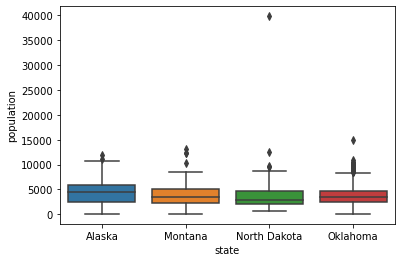

In [13]:
sns.boxplot(x=states_2['state'], y=states_2['population'])
plt.show()

<AxesSubplot:>

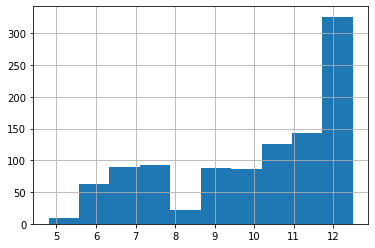

In [14]:
df[df['state']=="Oklahoma"]['urbanindex'].hist()

In [15]:
states_3=df[(df['state']=="Kentucky")  | (df['state']=="Kansas")]

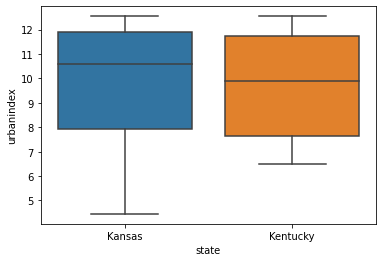

In [16]:
sns.boxplot(x=states_3['state'], y=states_3['urbanindex'])
plt.show()

In [17]:
cols_num_3 = ['population', 'adj_radiuspop_5'] 
correlation_3=df.groupby('state')[cols_num_3].corr()




<AxesSubplot:ylabel='state-None'>

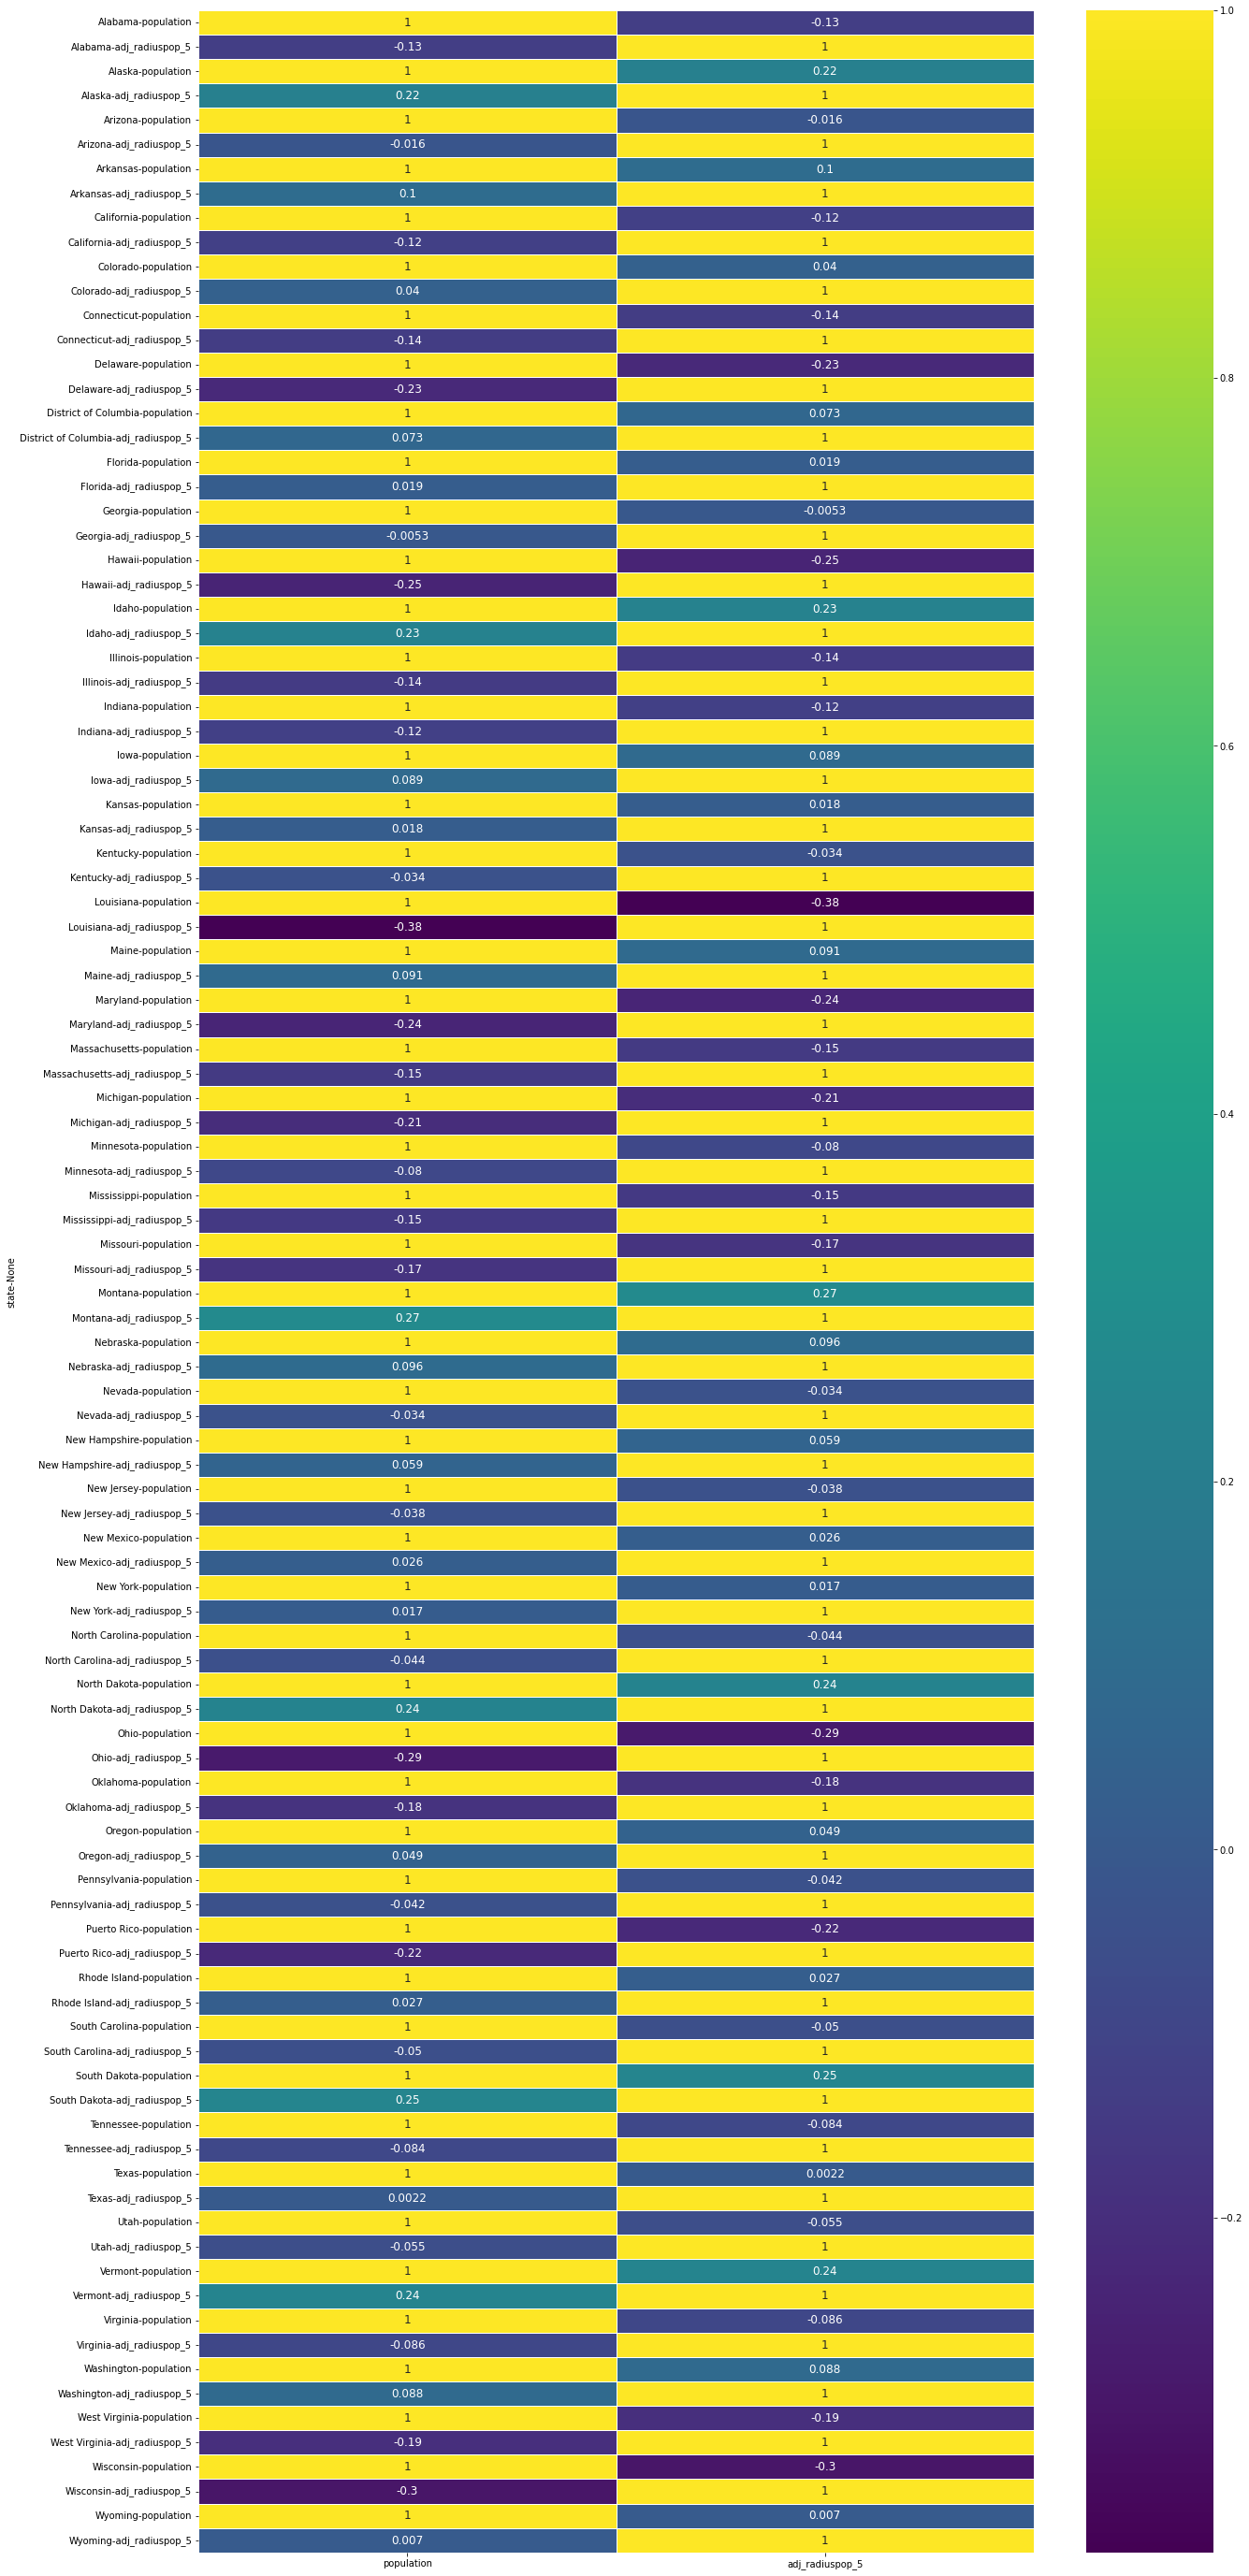

In [25]:
  
fig , ax = plt.subplots(figsize = (20,50))  

sns.heatmap(correlation_3, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})




In [19]:
df[df['state']=="Wisconsin"]

,Unnamed: 0,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex,log_pop
70870,70870,55,Wisconsin,G5500010950100,44.20223,-89.75330,2936,1612.235,7.385377,7.984803
70871,70871,55,Wisconsin,G5500010950201,44.00703,-89.88520,1223,1428.803,7.264593,7.109062
70872,70872,55,Wisconsin,G5500010950202,44.08342,-89.78523,2544,1428.803,7.264593,7.841493
70873,70873,55,Wisconsin,G5500010950400,43.94038,-89.74453,4520,1107.119,7.009517,8.416267
70874,70874,55,Wisconsin,G5500010950501,43.88084,-89.89495,1577,1335.869,7.197337,7.363280
...,...,...,...,...,...,...,...,...,...,...
72257,72257,55,Wisconsin,G5501410011300,44.36275,-89.83377,4640,32251.000,10.381300,8.442470
72258,72258,55,Wisconsin,G5501410011400,44.36639,-89.80318,4832,27809.000,10.233120,8.483016
72259,72259,55,Wisconsin,G5501410011500,44.36507,-89.75845,5756,23642.000,10.070780,8.657998
72260,72260,55,Wisconsin,G5501410011600,44.29250,-89.80911,5025,7443.000,8.915030,8.522181
